<a id='0'></a>
# [0 Project Introduction](#99)

The goal of this project is to explore the data, perform statistical tests, perform feature engineering and data manipulation, and to augment the dataset synthetically (if needed, for building ML models.)

<a id='0.1'></a>
## [0.1 Dataset Provenance and Context](#99)

Electronic Health Records **(EHRs) are the primary source** of data for the Diabetes Prediction dataset. EHRs are digital versions of patient health records that contain information about their medical history, diagnosis, treatment, and outcomes. The data in EHRs is collected and stored by healthcare providers, such as hospitals and clinics, as part of their routine clinical practice.

To create the Diabetes Prediction dataset, EHRs were collected from multiple healthcare providers and aggregated into a single dataset. The data was then **cleaned and preprocessed** to ensure consistency and remove any irrelevant or incomplete information.

The use of EHRs as a data source for the Diabetes Prediction dataset has several advantages. First, EHRs contain a large amount of patient data, including **demographic and clinical information,** which can be used to develop accurate machine learning models. Second, EHRs provide a **longitudinal view of a patient's health over time,** which can be used to **identify patterns and trends in their health status.** Finally, EHRs are widely used in clinical practice, making the Diabetes Prediction dataset relevant to **real-world healthcare settings.**

<a id='0.2'></a>
## [0.2 Collection Methodology](#99)
The collection methodology for the diabetes prediction dataset involves gathering medical and demographic data from patients **who have been diagnosed with or are at risk of developing diabetes.** The data is typically collected through surveys, medical records, and laboratory tests. The data includes features such as **age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.** The data is then processed and cleaned to remove any errors or inconsistencies. The dataset can also be used for research purposes to identify potential risk factors for diabetes and to develop effective prevention and treatment strategies.

<a id='0.3'></a>
## [0.3 About Dataset](#99)
The Diabetes prediction dataset is a collection of **medical** and **demographic data** from patients, along with their **diabetes status (positive or negative).** The data includes features such as **age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.** This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

<a id = '99'></a>
# [Contents](#99)
- [0. Title](#0)
- [0.1 Dataset Provenance and Context](#0.1)
- [0.2 Collection Methodology](#0.2)
- [0.3 About Dataset](#0.3)
- [1. Problem Statement](#1)
- [2. Preprocessing](#2)
- [3. Exploratory Data Analysis](#3)
>- [3.1 Univariate Analysis](#3.1)
>- [3.2 Bivariate Analysis](#3.2)
>- [3.3 Multivariate Analysis](#3.3)
>- [3.4 Statistical Tests of Independence: Multi-collinearity, one-way ANOVA, t-tests, correlation analysis](#3.4)
>- [3.5 Inferences](#3.5)
- [4. Feature Engineering](#4)
- [5. Building Data Pipelines](#5)

<a id = '1'></a>
## [1. Problem Statement](#99)
Using demographic & health data, build a predictive model for the occurence of diabetes in patients. Write modular code using SOLID principles with an endpoint so that the model can be deployed and scaled with ease.
- **Analyze** the data to find patterns
- **Identify** the most prominent signals for diabetes
- **Build** a prediction algorithm that can be deployed at scale
- **Write** modular code and add link to GitHub repo
- (**Optional**: Create an API endpoint and serve the model in cloud eg, Taipy)

In [1]:
%%capture

import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn.objects as so
import scipy.stats
from scipy.stats import zscore

%matplotlib inline

# Set plot style
sns.set(color_codes=True)
sns.set_style("darkgrid")
#plt.style.use("ggplot")
#sns.choose_diverging_palette()
sns.diverging_palette(h_neg = 0, h_pos=355, s=100, l=50, sep=1, n=16, center='dark', as_cmap=False)

plt.rcParams['figure.figsize']=15,8
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)
pd.pandas.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings('ignore')

path = '/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv'
df = pd.read_csv(path)



In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.000,0,1,never,25.190,6.600,140,0
1,Female,54.000,0,0,No Info,27.320,6.600,80,0
2,Male,28.000,0,0,never,27.320,5.700,158,0
3,Female,36.000,0,0,current,23.450,5.000,155,0
4,Male,76.000,1,1,current,20.140,4.800,155,0


In [ ]:
df['gender']

In [39]:
df.gender.value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

We can see categorical/qualitative data in `gender` and `smoking_history` columns. These features can be statistically interesting. I will explore this further later on.

<a id = 2></a>
## [2. Missing Data: Approaches](#99)
The novice uses the imputation strategy or worse, a simple dropping of the rows. But this is suboptimal for many reasons. Some advanced approaches go like this:

### Stage 1: Think about why data would be missing
- Understanding the why behind missing data is more important than just blindly applying an imputation technique.
- The key to identifying the type of missingness is not a statistical test, but rather investigative reasoning and domain knowledge.

### Stage 2: Identifying the type of "missingness"
#### 1. **Missing Completely at Random (MCAR)**
- *The Core Idea:* The reason the data is missing has nothing to do with any other data, either observed or unobserved. The missingness is a purely random event. It's like a perfectly fair coin flip decided whether to delete a data point.
- How to Identify (The Thought Process):
>- "Is there any logical reason this value is missing?" If the answer is no, it might be MCAR.
>- "Could this be a technical glitch?" Data corruption, a sensor failing intermittently for no reason, or a survey respondent accidentally skipping a question are common causes.
>- "If I look at other columns, is there a pattern in the missingness?" For example, if you plot a histogram of another variable (e.g., age) for the rows where salary is missing, does it look the same as the histogram for rows where salary is not missing? If they look the same, it's a good sign of MCAR.
>- Lab Sample Error (General): A lab technician is analyzing blood samples. They accidentally drop and break two vials. The data for these two patients is now missing. The reason it's missing (clumsiness) has no relationship to the patients' age, gender, or health conditions. This is a perfect example of MCAR.
>- Survey Context: A web survey has a page break. A small percentage of users have slow internet and the next page fails to load, so their subsequent answers are missing. The missingness is due to the user's internet connection, not the questions being asked.

- **Strategy if you suspect MCAR:**
>- This is the *only scenario* where **deleting the rows** (.dropna()) is generally safe, but only if the number of missing rows is small (e.g., < 5%). Deleting a large number of rows is always wasteful.
>- **Simple imputation (mean, median)** also works well because the missing data points are not systematically different from the observed ones.

#### 2. Missing at Random (MAR)
- *The Core Idea:* The reason the data is missing is related to other data you have collected in your dataset. It's not purely random, but you can explain the missingness using other variables.

- How to Identify (The Thought Process):
>- "Is there another column in my dataset that could predict whether this value is missing?"
>- "Do certain groups of people or things tend to have more missing data in this column?"
>- Let's analyze this. For the rows where column_X is missing, what are the values in column_Y and column_Z? Do they look different from the rows where column_X is not missing?
>- Medical Context (Classic Example): A survey asks both men and women about their mental health. It also asks for their income. You notice that men are significantly more likely to leave the "number of therapy sessions" question blank than women. The missingness in "therapy sessions" is not random; it's related to the gender column, which you have. The missingness is random within the group of men.
>- Financial Context: In a loan application dataset, people with higher debt-to-income_ratio are more likely to leave the optional liquid_assets field blank. The missingness in liquid_assets can be explained by the debt-to-income_ratio variable.

- **Strategy if you suspect MAR:**
>- **Do NOT delete the rows.** This will introduce bias. For instance, in the therapy example, deleting rows with missing data would mean you are disproportionately removing men from your dataset, skewing your analysis.
>- This is where more **advanced imputation methods** shine. **Predictive imputation (using regression) or KNN Imputation** are excellent choices because **they use the other related columns** (like gender or age) to make an intelligent guess about the missing value.

#### 3. Missing Not at Random (MNAR)
*The Core Idea:* The reason the data is missing is related to the missing value itself. The value of the missing data is the cause of its absence. This is the most problematic type.

- How to Identify (The Thought Process):
>- "Is there a reason someone would intentionally hide this information?" This often involves sensitive topics.
>- "Could the missingness be a result of the value itself?"
>- This is the hardest to confirm because you can't see the missing value. It often requires strong domain expertise and logical deduction.
>- Income Survey (Classic Example): People with very high incomes or very low (or zero) incomes are often the most likely to refuse to answer the question "What is your annual income?". The missingness is directly related to the value of the income itself.
>- Mental Health App: A user is tracking their daily mood in an app. On days they feel extremely depressed, they don't have the energy or motivation to open the app and log their mood. The missing mood_score is caused by the mood itself being very low.

- **Strategy if you suspect MNAR:**
>- This is very tricky. Simple imputation is likely to be wrong (e.g., imputing the average income when the missing values are from the highest earners will badly skew the results).
>- Feature Engineering is your best tool. Create an indicator variable. In the malfunction example, you would create a new column is_malfunction_log_missing. This binary feature could be highly predictive, as it might signal an unrecorded issue.
>- More advanced statistical models (e.g., Heckman models, selection models) are designed for this, but in a data science interview, it's enough to identify the problem and suggest creating an indicator variable as a practical first step.

In [4]:
# Displays count of duplicate rows and drops them
print(df.duplicated().sum())

df.drop_duplicates(inplace = True, ignore_index = True)

3854


In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000,96146.000,96146.000,96146.000,96146.000,96146.000,96146.000
mean,41.794,0.078,0.041,27.321,5.533,138.218,0.088
std,22.463,0.268,0.198,6.768,1.073,40.910,0.284
min,0.080,0.000,0.000,10.010,3.500,80.000,0.000
25%,24.000,0.000,0.000,23.400,4.800,100.000,0.000
50%,43.000,0.000,0.000,27.320,5.800,140.000,0.000
75%,59.000,0.000,0.000,29.860,6.200,159.000,0.000
max,80.000,1.000,1.000,95.690,9.000,300.000,1.000


In [6]:
# Missing datapoints - Perform statistical tests for MCAR, MAR and MNAR 
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
# Categorical types encoding

display(df.select_dtypes('O').columns)
display(df['gender'].value_counts()/df.shape[0])
display(df['smoking_history'].value_counts()/df.shape[0])
display(df['diabetes'].value_counts()/df.shape[0])

Index(['gender', 'smoking_history'], dtype='object')

gender
Female   0.584
Male     0.416
Other    0.000
Name: count, dtype: float64

smoking_history
never         0.358
No Info       0.342
former        0.097
current       0.096
not current   0.066
ever          0.042
Name: count, dtype: float64

diabetes
0   0.912
1   0.088
Name: count, dtype: float64

**Firstly,** "smoking_history" has **~34% values with no information**("No Info"). 

This is definitely something that warrants investigation. Below are three hypotheses I want to test. The null hypotheses are the opposite of the below:

**Hypothesis #1:** Smoking_history "No Info" has something to do with gender being female. Females may have less of a tendency to admit they were smokers, due to test or survey environment/conditions, introducing a MAR missingness.

**Hypothesis #2:** Too young people may not have given out data on smoking (either due to fear of being punished or societal taboo) 

**Hypothesis #3:** Too old people or may not have been available for survey, or to be able to give out proper survey responses. If the records aare indeed electronic, the older people's data must have been analog (paper records), and older records could have been misplaced.

**Hypothesis #4:** Women might have a higher tendency to have given up smoking than men.




# Hypothesis Test 1:

- Null Hypothesis H0: The variables `Smoking_history` and `Gender` are independent. 
- Alt Hypothesis H1: The variables `Smoking_history` and `Gender` are independent.

Perform a Chi-2 Test of Independence. If p<0.05, the null hypothesis can be rejected. 

In [13]:
df[df['smoking_history']=="never"].shape

(34398, 9)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96146 entries, 0 to 96145
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
 9   has_smoked           96146 non-null  bool   
 10  is_female            96146 non-null  bool   
dtypes: bool(2), float64(3), int64(4), object(2)
memory usage: 6.8+ MB


In [21]:
import scipy.stats as ss

df['has_smoked'] = (df['smoking_history']=='never')
df['is_female'] = (df['gender']=='female')
contingency_table_gender_smoking = pd.crosstab(df['is_female'], df['has_smoked'])
display(contingency_table_gender_smoking)

chi2, p_val, dof, expected = ss.chi2_contingency(contingency_table_gender_smoking)

print(f"Chi-square statistic:{chi2:.4f}")
print(f"p-value: {p_val:.4f}")

has_smoked,False,True
is_female,,
False,61748,34398


Chi-square statistic:0.0000
p-value: 1.0000


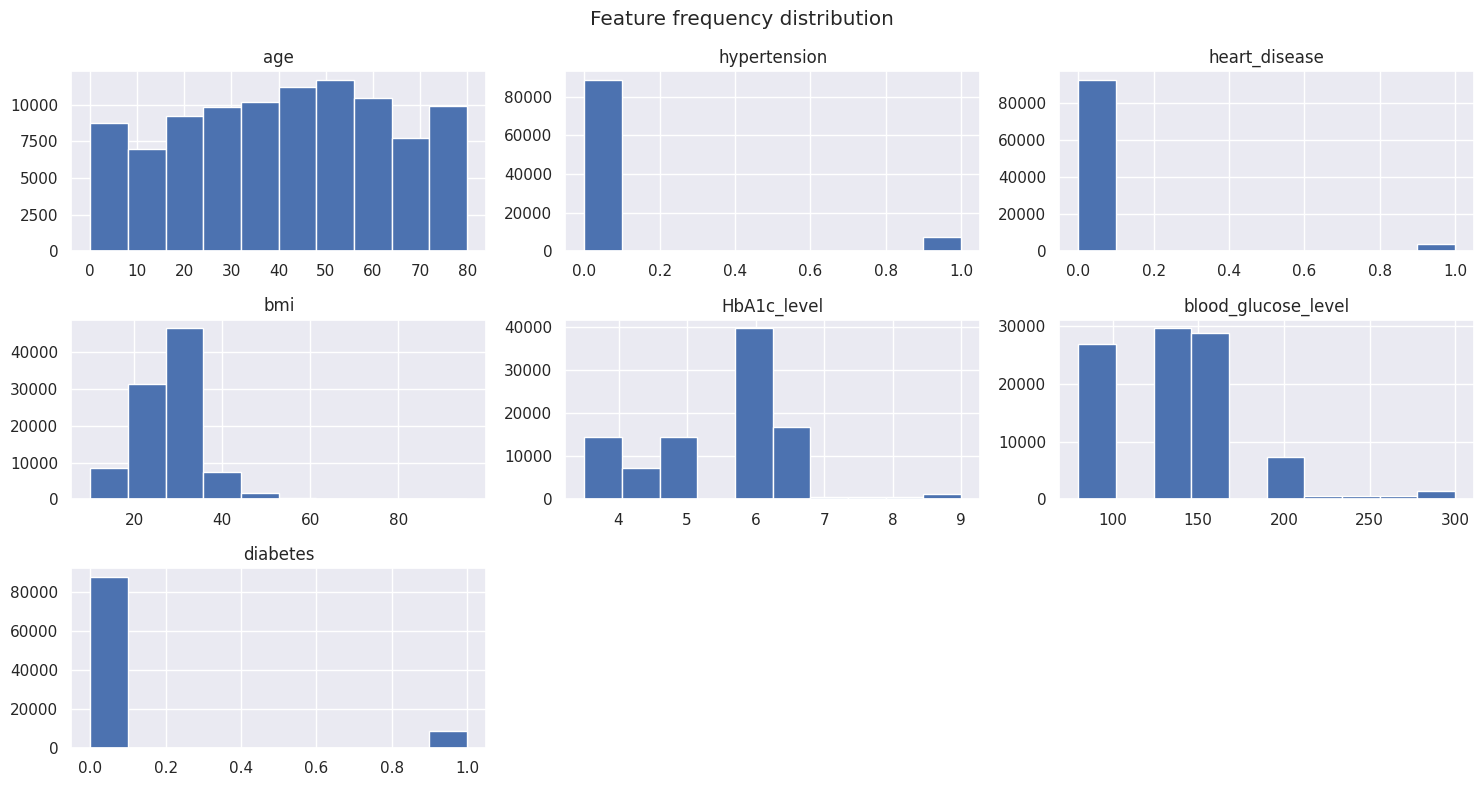

In [36]:
df.select_dtypes(exclude=['O']).hist()
plt.suptitle('Feature frequency distribution')
plt.tight_layout();

In [ ]:
import pandas as pd
from typing import Any, Literal

def data_ingestion(path: str|None)-> Any(pd.DataFrame, None):
    if path & path[-4] == '.csv':
        df = pd.read_csv(path)
        return df

    else:
        return None

In [ ]:
# 1. Encoding gender
print(df['gender'].value_counts())

gender_map = {'Male':0, 'Female':1, 'Other':2}
df['gender'] = df['gender'].replace( gender_map)

# [Statistical tests](#)


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Create a more complex DataFrame ---
np.random.seed(42)
data = {
    'age': np.random.randint(22, 75, size=1000),
    'income': np.random.randint(30000, 250000, size=1000),
    'city': np.random.choice(['New York', 'Chicago', 'San Francisco'], size=1000, p=[0.5, 0.3, 0.2])
}
df = pd.DataFrame(data)

# Introduce missing values based on age (MAR)
df['income'] = df.apply(
    lambda row: np.nan if np.random.rand() < (row['age'] / 100.0) else row['income'],
    axis=1
)

# --- Step 2: Create the Indicator Variable ---
df['income_is_missing'] = df['income'].isnull()

print("DataFrame with indicator variable:")
print(df.head())

# --- Step 3: Create a Grid of Subplots for Visual Analysis ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # 1 row, 2 columns of plots

fig.suptitle('Visual Analysis of Income Missingness', fontsize=18, fontweight='bold')

# Plot 1: Age vs. Missingness (Numerical Variable)
sns.kdeplot(data=df, x='age', hue='income_is_missing', fill=True, ax=axes[0], palette='viridis')
axes[0].set_title('Age Distribution by Income Missingness', fontsize=14)
axes[0].set_xlabel('Age')

# Plot 2: City vs. Missingness (Categorical Variable)
# We use a countplot to see the proportions
sns.countplot(data=df, x='city', hue='income_is_missing', ax=axes[1], palette='magma')
axes[1].set_title('City Counts by Income Missingness', fontsize=14)
axes[1].set_xlabel('City')
axes[1].tick_params(axis='x', rotation=15)


plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for suptitle
plt.show()



from scipy.stats import chi2_contingency, mannwhitneyu

# --- Test 1: Chi-Squared (Categorical vs. Categorical) ---
# Is there a relationship between 'city' and 'income_is_missing'?
contingency_table = pd.crosstab(df['city'], df['income_is_missing'])
chi2, p_val_chi2, _, _ = chi2_contingency(contingency_table)

print("\n--- Chi-Squared Test: City vs. Missingness ---")
print(f"Contingency Table:\n{contingency_table}")
print(f"P-value: {p_val_chi2:.4f}")
if p_val_chi2 < 0.05:
    print("Result: Reject H₀. There IS a significant association (evidence of MAR).")
else:
    print("Result: Fail to reject H₀. No significant association found.")

# --- Test 2: Mann-Whitney U Test (Categorical vs. Numerical) ---
# Is there a significant difference in 'age' between the two groups?
group_missing = df[df['income_is_missing'] == True]['age']
group_not_missing = df[df['income_is_missing'] == False]['age']

u_stat, p_val_mannu = mannwhitneyu(group_missing, group_not_missing)

print("\n--- Mann-Whitney U Test: Age vs. Missingness ---")
print(f"P-value: {p_val_mannu:.4f}")
if p_val_mannu < 0.05:
    print("Result: Reject H₀. The age distributions ARE significantly different (evidence of MAR).")
else:
    print("Result: Fail to reject H₀. The age distributions are not significantly different.")
